<a href="https://colab.research.google.com/github/gerardlara/Yves-and-Gerry-PPP/blob/main/Predatorandpreymodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem statment 
### Is it effective to use predator to kill pests instead of using pesticides?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Species model without bounds but bounded by carrying capacity 




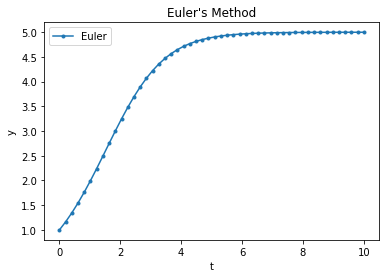

In [ ]:
# starting with a simple model of exponential growth of predator and prey
def f(t,y):
  alpha=1
  k=5
  return alpha*y*(1-y/k)   # returns derivative of y

y0 = 20 # if we start with this population
sol = solve_ivp(f, [0,5],[y0])
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!

def euler(f,t,y0):
  y = np.zeros_like(t)
  y[0] = y0

  for i in range(len(t)-1):
    y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])

  return y

t = np.linspace(0, 10, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,10,200)
k=1
ysol = np.exp(k*tsol)
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()

# I expected that the pests and the predator will grow exponentially and that is what I saw and now I am going to analyse what happens when these pests encounters the predators and allee effect is involved  

# Allee effect on single species

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


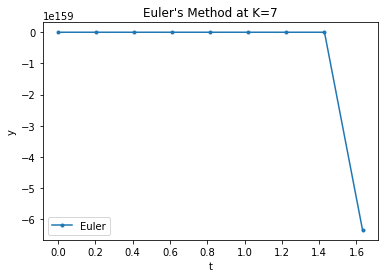

In [ ]:


def f(t,y):
  r=1
  k=7
  A=1/k
  return r*y*(1-y/k)*(y/A-1)   # returns derivative of y

y0 = 20
sol = solve_ivp(f, [0,5],[y0])
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!

def euler(f,t,y0):
  y = np.zeros_like(t)
  y[0] = y0

  for i in range(len(t)-1):
    y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])

  return y



t = np.linspace(0, 10, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,10,200)
k=1
ysol = np.exp(k*tsol)
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method at K=7')
plt.show()

### This is what I expected to see that the species with weak allee effect are not going to extinctic. Instead, they will bounce back and forth. however, when alley effect is big then they species will excitinct and we need our predators to have weak allee effect 


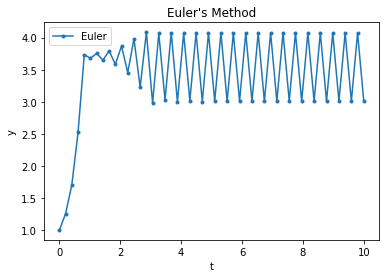

In [ ]:
# what happens to the pest when we have allee effect 
def f(t,y):
  gama=4
  theta=1/gama
  h=1
  return y*(1-y/gama)*(y/theta-1)-h*y   # returns derivative of y

y0 = 20
sol = solve_ivp(f, [0,5],[y0])
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!

t = np.linspace(0, 10, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,5,200)
k=1
ysol = np.exp(k*tsol)
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()

# Interaction between the predator and Prey easy models.

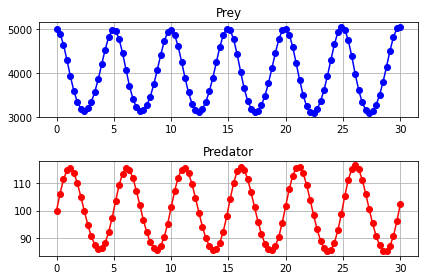

In [ ]:
def f(t,y):
  a0 = 2
  d0 = 0.02
  a1 = 0.0002
  d1 = 0.8
  y0 = y[0]
  y1 = y[1]
  return [a0*y0 - d0*y0*y1, a1*y0*y1 - d1*y1] 
t = np.linspace(0,30,100)
tf = 30
prey0 = 5000
pred0 = 100
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey')

plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()

# I expected this kind of movment between the predator and the prey which is when the predator are higher the prey are lower in natural world. This happens when we consider only natural process where the pests are  not being decreases by anything but lets look at when other parameters are introduced. 


## This is  what I expected because when we are calling the pests they tend to decrecreaand theis may reach zero if it is done extensively

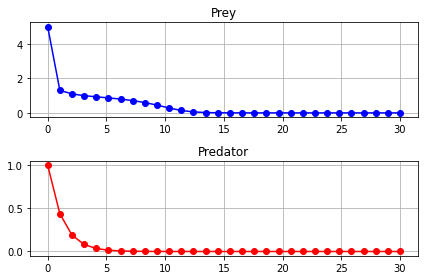

In [ ]:
# Happens when the predator are added in the model of the prey 
def f(t,y):
  gama=1
  theta=1
  h=0.05
  zetha=1
  alpha=1.3
  b=0.3
  q=0.2
  y0 = y[0]
  y1 = y[1]
  return [y0*(1-y0/gama)*(y0/theta-1)-h*y0-((y0*y1)/(1+y0+alpha*zetha)), ((b*(y0+zetha)*y1)/(1+y0+alpha*zetha))-(gama*y1)   ] 
t = np.linspace(0,30,30)
tf = 30
prey0 = 5
pred0 = 1
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Prey,alpha=1')

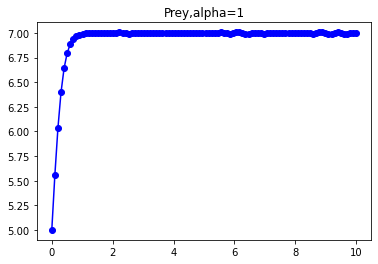

In [ ]:
def f(t,y):
  gama=7
  theta=1
  h=0.05
  zetha=1
  alpha=0.00000003
  betha=0.3
  d1 = 0.8
  y0 = y[0]
  y1 = y[1]
  return [y0*(1-y0/gama)*(y0-theta), (betha*(y0+zetha)*y1)/(1+y0+alpha*zetha)] 
t = np.linspace(0,10,100)
tf = 30
prey0 = 5
pred0 = 10
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

#plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey,alpha=1')



(-2.0, 2.0)

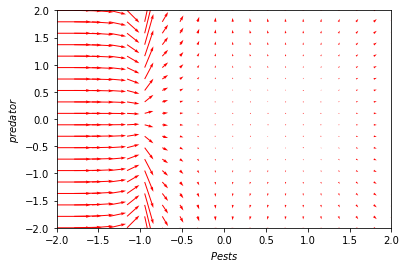

In [ ]:
def f(Y, t):
  gama=4
  theta=1
  h=0.05
  zetha=2
  alpha=.0006
  betha=0.3
  d1 = 0.8
  y0, y1=Y
  return [y0*(1-y0/gama)*(y0-theta), (betha*(y0+zetha)*y1)/(1+y0+alpha*zetha)]

y0 = np.linspace(-2.0, 2, 20)
y1 = np.linspace(-2.0, 2, 20)

Y1, Y2 = np.meshgrid(y0, y1)

t = 0
             
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')
plt.title("alpha")
plt.xlabel('$Pests$')
plt.ylabel('$predator$')
plt.xlim([-2, 2])
plt.ylim([-2,2])

In [ ]:
from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
#plt.savefig('images/phase-portrait-2.png')
plt.show()

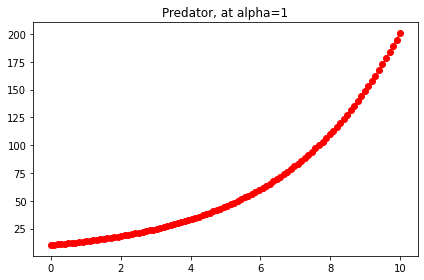

In [ ]:
plt.grid()
#plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator, at alpha=1')
plt.grid()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Prey,zeta=7')

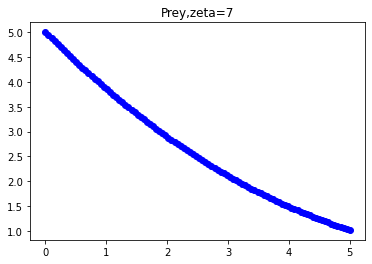

In [ ]:
def f(t,y):
  gama=7
  theta=1
  h=0.05
  zetha=7
  alpha=5
  betha=0.3
  d1 = 0.8
  y0 = y[0]
  y1 = y[1]
  return [-y0*y1/(1+y0+alpha*zetha), (betha*(y0+zetha)*y1)/(1+y0+alpha*zetha)] 
t = np.linspace(0,5,100)
tf = 30
prey0 = 5
pred0 = 10
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

#plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey,zeta=7')

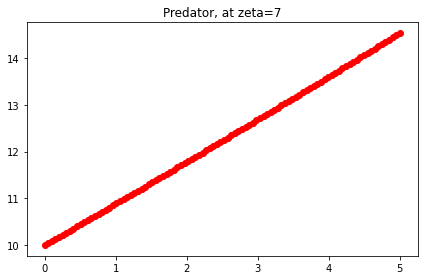

In [ ]:
plt.grid()
#plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator, at zeta=7')
plt.grid()
plt.tight_layout()
plt.show()

(-2.0, 2.0)

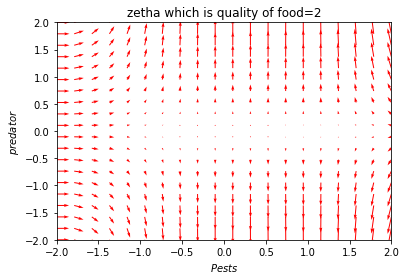

In [ ]:
  def f(Y, t):
    gama=0.2
    K=1
    theta=0.1
    h=0.05
    zetha=2
    alpha=1.3
    b=150
    q=0.2
    y0, y1=Y
    return [y0*(1-y0/K)*(y0/theta-1)-h*y0-((y0*y1)/(1+y0+alpha*zetha)), ((b*(y0+zetha)*y1)/(1+y0+alpha*zetha))-(gama*y1)]

y0 = np.linspace(-2.0, 2, 20)
y1 = np.linspace(-2.0, 2, 20)

Y1, Y2 = np.meshgrid(y0, y1)

t = 0
             
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')
plt.title("zetha which is quality of food=2")
plt.xlabel('$Pests$')
plt.ylabel('$predator$')
plt.xlim([-2, 2])
plt.ylim([-2,2])
